The noise cleaning process in the code  is done using DeepFilterNet, which is a deep learning-based approach for denoising audio signals. 

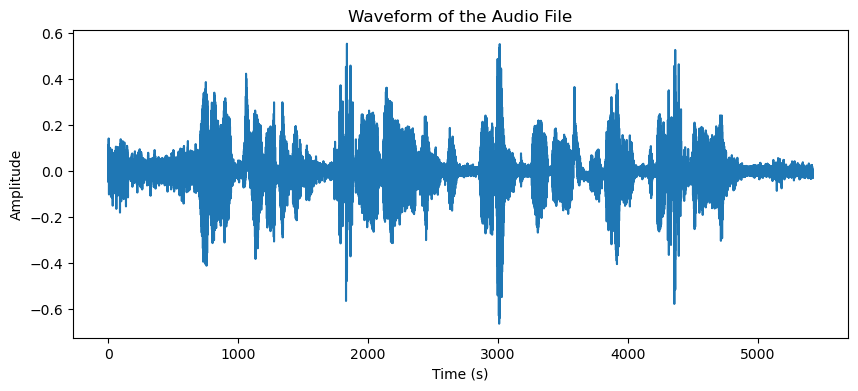

In [3]:
import matplotlib.pyplot as plt
import librosa
audio_path = r"C:\Users\Plaksha\Desktop\Sem 6\Deep Learning\Project\Audio\assets_noisy_snr0.wav"

signal, sr = librosa.load(audio_path, sr=None)  
time = librosa.times_like(signal, sr=sr)

plt.figure(figsize=(10, 4))
plt.plot(time, signal)
plt.title('Waveform of the Audio File')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


1. **Waveform of the Noisy Audio File**: 
    - The amplitude of this waveform fluctuates significantly throughout the duration of the audio, indicating variability in the loudness and potential presence of noise.
    - There are peaks that suggest either loud audio segments or bursts of noise.
    - The noise can be due to various factors like background sounds, electrical noise, or distortions in the recording.


In [3]:
from df.enhance import enhance, init_df, load_audio, save_audio

if __name__ == "__main__":
    # Load default model
    model, df_state, _ = init_df()

    # Specify the local path where you saved the audio file
    audio_path = r"C:\Users\Plaksha\Desktop\Sem 6\Deep Learning\Project\Audio\assets_noisy_snr0.wav"

    # Load the audio from the specified path
    audio, _ = load_audio(audio_path, sr=df_state.sr())

    # Denoise the audio
    enhanced = enhance(model, df_state, audio)

    # Save the enhanced audio in the same folder
    save_path = r"C:\Users\Plaksha\Desktop\Sem 6\Deep Learning\Project\Audio\enhanced.wav"
    save_audio(save_path, enhanced, df_state.sr())

    print(f"Enhanced audio saved at: {save_path}")


2024-03-07 20:01:30 | INFO     | DF | Loading model settings of DeepFilterNet3
2024-03-07 20:01:30 | INFO     | DF | Using DeepFilterNet3 model at C:\Users\Plaksha\AppData\Local\DeepFilterNet\DeepFilterNet\Cache\DeepFilterNet3
2024-03-07 20:01:30 | INFO     | DF | Initializing model `deepfilternet3`
2024-03-07 20:01:30 | INFO     | DF | Found checkpoint C:\Users\Plaksha\AppData\Local\DeepFilterNet\DeepFilterNet\Cache\DeepFilterNet3\checkpoints\model_120.ckpt.best with epoch 120
2024-03-07 20:01:30 | INFO     | DF | Running on device cpu
2024-03-07 20:01:30 | INFO     | DF | Model loaded
Enhanced audio saved at: C:\Users\Plaksha\Desktop\Sem 6\Deep Learning\Project\Audio\enhanced.wav


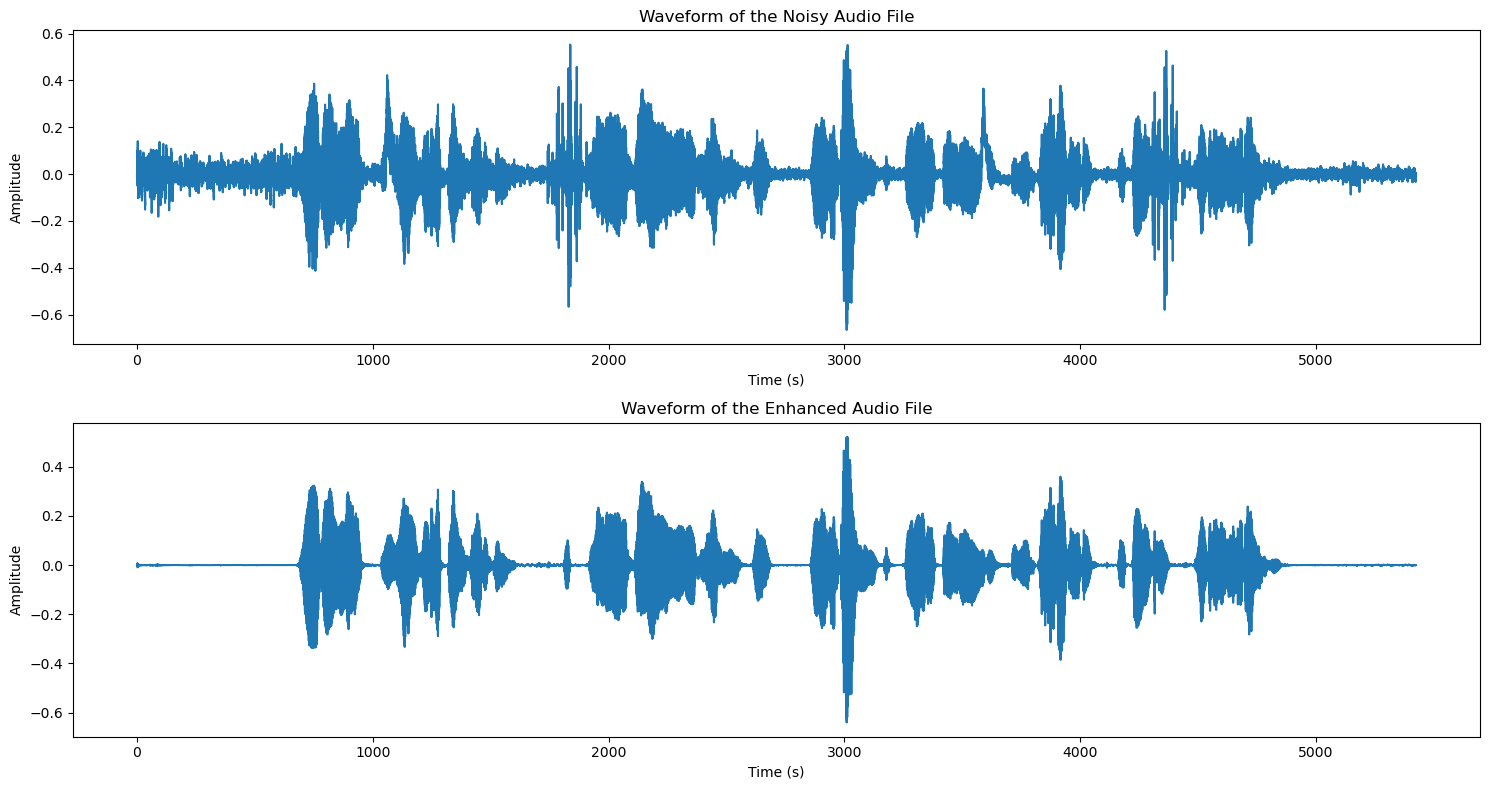

In [5]:
import matplotlib.pyplot as plt
import librosa

# Paths to the audio files
noisy_audio_path = r"C:\Users\Plaksha\Desktop\Sem 6\Deep Learning\Project\Audio\assets_noisy_snr0.wav"
enhanced_audio_path = r"C:\Users\Plaksha\Desktop\Sem 6\Deep Learning\Project\Audio\enhanced.wav"

# Load the noisy audio file
noisy_signal, noisy_sr = librosa.load(noisy_audio_path, sr=None)

# Load the enhanced audio file
enhanced_signal, enhanced_sr = librosa.load(enhanced_audio_path, sr=None)

# Ensure both files have the same sampling rate
assert noisy_sr == enhanced_sr, "Sampling rates do not match"

# Generate time axes for the audio signals
noisy_time = librosa.times_like(noisy_signal, sr=noisy_sr)
enhanced_time = librosa.times_like(enhanced_signal, sr=enhanced_sr)

# Plotting the waveforms
plt.figure(figsize=(15, 8))

# Plot the noisy audio
plt.subplot(2, 1, 1)
plt.plot(noisy_time, noisy_signal)
plt.title('Waveform of the Noisy Audio File')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the enhanced audio
plt.subplot(2, 1, 2)
plt.plot(enhanced_time, enhanced_signal)
plt.title('Waveform of the Enhanced Audio File')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


2. **Waveform of the Enhanced Audio File**: 
    - Compared to the noisy audio, the amplitude fluctuations here seem to be less extreme.
    - This suggests that some form of noise reduction or audio enhancement technique has been applied to the audio signal.
    - The waveform looks smoother, which usually is an indicator that the signal-to-noise ratio might have been improved.

